# EDA-Distribuicao-de-Jogos-Brasileirao-2012-2022

## Objetivo


O principal objetivo dessa análise foi de criar uma visualização do território brasileiro destacando a distribuição espacial da quantidade de jogos no Campeonato Brasileiro Série A em cada estado ao longo do intervalo de 2012 a 2022.

## Descrição da Base de Dados


Os conjuntos de dados utilizados nesta análise foram obtidos a partir do Kaggle e também estão disponíveis no GitHub, cortesia do autor Adao duque.

Kaggle: <https://www.kaggle.com/datasets/adaoduque/campeonato-brasileiro-de-futebol/data>

Github: <https://github.com/adaoduque/Brasileirao_Dataset>


Para a análise em específico, foram apenas utilizados o data sets 'campeonato-brasileiro-full.csv' e  'campeonato-brasileiro-full.csv'

## Instalando depedências

In [2]:
#pip install -r requirements.txt

In [7]:
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
import geodatasets
from geopy import geocoders

## Carregando DataSets

In [ ]:
df_jogos = pd.read_csv('campeonato-brasileiro-full.csv')

In [ ]:
df_gols = pd.read_csv('campeonato-brasileiro-gols.csv')

In [ ]:
br = gpd.read_file('BR_UF_2021.shp')

In [ ]:
df_jogos.head(2)

,ID,rodata,data,hora,mandante,visitante,formacao_mandante,formacao_visitante,tecnico_mandante,tecnico_visitante,vencedor,arena,mandante_Placar,visitante_Placar,mandante_Estado,visitante_Estado
0,1,1,29/3/2003,16:00,Guarani,Vasco,NaN,NaN,NaN,NaN,Guarani,Brinco de Ouro,4,2,SP,RJ
1,2,1,29/3/2003,16:00,Athletico-PR,Gremio,NaN,NaN,NaN,NaN,Athletico-PR,Arena da Baixada,2,0,PR,RS


In [ ]:
df_gols.head(2)

,partida_id,rodata,clube,atleta,minuto,tipo_de_gol
0,4607,1,Fluminense,Fred,45,Penalty
1,4607,1,Fluminense,Nirley da Silva Fonseca,59,Gol Contra


In [ ]:
br.head(2)

,CD_UF,NM_UF,SIGLA,NM_REGIAO,geometry
0,11,Rondônia,RO,Norte,"POLYGON ((-62.86662 -7.97587, -62.86017 -7.982..."
1,12,Acre,AC,Norte,"POLYGON ((-73.16550 -7.34166, -73.05480 -7.381..."


## Data Clean

In [ ]:
df_jogos.head(2)

,ID,rodata,data,hora,mandante,visitante,formacao_mandante,formacao_visitante,tecnico_mandante,tecnico_visitante,vencedor,arena,mandante_Placar,visitante_Placar,mandante_Estado,visitante_Estado
0,1,1,29/3/2003,16:00,Guarani,Vasco,NaN,NaN,NaN,NaN,Guarani,Brinco de Ouro,4,2,SP,RJ
1,2,1,29/3/2003,16:00,Athletico-PR,Gremio,NaN,NaN,NaN,NaN,Athletico-PR,Arena da Baixada,2,0,PR,RS


In [ ]:
df_jogos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8025 entries, 0 to 8024
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  8025 non-null   int64 
 1   rodata              8025 non-null   int64 
 2   data                8025 non-null   object
 3   hora                8025 non-null   object
 4   mandante            8025 non-null   object
 5   visitante           8025 non-null   object
 6   formacao_mandante   3051 non-null   object
 7   formacao_visitante  3051 non-null   object
 8   tecnico_mandante    3415 non-null   object
 9   tecnico_visitante   3415 non-null   object
 10  vencedor            8025 non-null   object
 11  arena               8025 non-null   object
 12  mandante_Placar     8025 non-null   int64 
 13  visitante_Placar    8025 non-null   int64 
 14  mandante_Estado     8025 non-null   object
 15  visitante_Estado    8025 non-null   object
dtypes: int64(4), object(12)


In [ ]:
df_jogos.drop(['formacao_mandante',
            'formacao_visitante',
            'tecnico_mandante',
            'tecnico_visitante',
            "mandante_Estado",
            "visitante_Estado"], inplace=True, axis=1)

In [ ]:
df_jogos.head(2)

,ID,rodata,data,hora,mandante,visitante,vencedor,arena,mandante_Placar,visitante_Placar
0,1,1,29/3/2003,16:00,Guarani,Vasco,Guarani,Brinco de Ouro,4,2
1,2,1,29/3/2003,16:00,Athletico-PR,Gremio,Athletico-PR,Arena da Baixada,2,0


In [ ]:
df_jogos['data'] = pd.to_datetime(df_jogos['data'],format='%d/%m/%Y')

In [ ]:
df_jogos.columns = ['JOGO_ID','RODADA',"DATA","HORA","MANDANTE","VISITANTE","VENCEDOR","ARENA","MANDANTE_PLACAR","VISITANTE_PLACAR"]

In [ ]:
df_jogos.head(2)

,JOGO_ID,RODADA,DATA,HORA,MANDANTE,VISITANTE,VENCEDOR,ARENA,MANDANTE_PLACAR,VISITANTE_PLACAR
0,1,1,2003-03-29,16:00,Guarani,Vasco,Guarani,Brinco de Ouro,4,2
1,2,1,2003-03-29,16:00,Athletico-PR,Gremio,Athletico-PR,Arena da Baixada,2,0


In [ ]:
anos = [i for i in range(2012,2023)]

In [ ]:
df_jogos['year'] = df_jogos['DATA'].apply(lambda x: x.year)
df_jogos = df_jogos[df_jogos['year'].isin(anos) == True]
df_jogos.reset_index(inplace=True, drop=True)

In [ ]:
df_jogos

,JOGO_ID,RODADA,DATA,HORA,MANDANTE,VISITANTE,VENCEDOR,ARENA,MANDANTE_PLACAR,VISITANTE_PLACAR,year
0,3847,1,2012-05-19,18:30,Palmeiras,Portuguesa,-,Pacaembu,1,1,2012
1,3848,1,2012-05-19,18:30,Sport,Flamengo,-,Ilha do Retiro,1,1,2012
2,3849,1,2012-05-19,21:00,Figueirense,Nautico,Figueirense,Orlando Scarpelli,2,1,2012
3,3850,1,2012-05-20,16:00,Corinthians,Fluminense,Fluminense,Pacaembu,0,1,2012
4,3851,1,2012-05-20,16:00,Internacional,Coritiba,Internacional,Beira Rio,2,0,2012
...,...,...,...,...,...,...,...,...,...,...,...
4174,8021,38,2022-11-13,16:03,Cuiaba,Coritiba,Cuiaba,Arena Pantanal,2,1,2022
4175,8022,38,2022-11-13,16:03,Bragantino,Fluminense,Fluminense,Nabizão,0,1,2022
4176,8023,38,2022-11-13,16:03,Corinthians,Atletico-MG,Atletico-MG,Neo Química Arena,0,1,2022
4177,8024,38,2022-11-13,16:03,Internacional,Palmeiras,Internacional,Estádio José Pinheiro Borda,3,0,2022


In [ ]:
df_jogos.shape

(4179, 11)

##Criando df_arenas

In [ ]:
df_jogos.head(2)

,JOGO_ID,RODADA,DATA,HORA,MANDANTE,VISITANTE,VENCEDOR,ARENA,MANDANTE_PLACAR,VISITANTE_PLACAR,year
0,3847,1,2012-05-19,18:30,Palmeiras,Portuguesa,-,Pacaembu,1,1,2012
1,3848,1,2012-05-19,18:30,Sport,Flamengo,-,Ilha do Retiro,1,1,2012


In [ ]:
df_jogos['ARENA'] = df_jogos['ARENA'].apply(lambda x:x.strip())

<ipython-input-105-30bf2393edaa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_jogos['ARENA'] = df_jogos['ARENA'].apply(lambda x:x.strip())


In [ ]:
arenas = df_jogos['ARENA'].value_counts().index.tolist()

In [ ]:
arenas

['Maracanã',
 'Morumbi',
 'Mineirão',
 'Estádio Raimundo Sampaio',
 'Arena Castelão',
 'Neo Química Arena',
 'Arena do Grêmio',
 'Estádio Joaquim Américo Guimarães',
 'Estádio José Pinheiro Borda',
 'Couto Pereira',
 'Estádio Urbano Caldeira',
 'Allianz Parque',
 'Arena Condá',
 'Adelmar da Costa Carvalho',
 'Estádio Nilton Santos',
 'Moisés Lucarelli',
 'Itaipava Arena Fonte Nova',
 'Barradão',
 'Estádio Vasco da Gama',
 'Orlando Scarpelli',
 'Ressacada',
 'Estádio Municipal Paulo Machado de Carvalho',
 'Estádio do Governo do Estado de Goiás (Serra Dourada)',
 'Nabizão',
 'Independência',
 'Engenhão',
 'Arena Pantanal',
 'Pacaembu',
 'Estádio Antônio Accioly',
 'Alfredo Jaconi',
 'Estádio da Serrinha',
 'Vila Capanema',
 'Serra Dourada',
 'Canindé',
 'Vila Belmiro',
 'Estádio Nacional de Brasília',
 'Arena de Pernambuco',
 'São Januário',
 'Luso-Brasileiro',
 'Estádio de Pituaçu',
 'Estádio Olímpico Pedro Ludovico Teixeira',
 'Estádio Municipal General Raulino de Oliveira',
 'Arena Jo

In [ ]:
def get_state(arena):
  estado=None
  geolocator = geocoders.GoogleV3(api_key='')
  loc = geolocator.geocode(query=f'estádio {arena}',timeout=1000)
  try:
        estado = loc.address.split(',')[-3].split('-')[-1]
        print(f'{arena} fica no estado {estado}')
  except:
        estado = None
        print(f'Estado não encontrado para {arena}')
  return estado

In [ ]:
estados_arenas = []
for arena in arenas:
  estados_arenas.append(get_state(arena))

Maracanã fica no estado  RJ
Morumbi fica no estado  SP
Mineirão fica no estado  MG
Estádio Raimundo Sampaio fica no estado  MG
Arena Castelão fica no estado  CE
Neo Química Arena fica no estado  SP
Arena do Grêmio fica no estado  RS
Estádio Joaquim Américo Guimarães fica no estado  PR
Estádio José Pinheiro Borda fica no estado  RS
Couto Pereira fica no estado  PR
Estádio Urbano Caldeira fica no estado  SP
Allianz Parque fica no estado  SP
Arena Condá fica no estado  SC
Adelmar da Costa Carvalho fica no estado  PE
Estádio Nilton Santos fica no estado  RJ
Moisés Lucarelli fica no estado  SP
Itaipava Arena Fonte Nova fica no estado  BA
Barradão fica no estado  BA
Estádio Vasco da Gama fica no estado  RJ
Orlando Scarpelli fica no estado  SC
Ressacada fica no estado  State of Santa Catarina
Estádio Municipal Paulo Machado de Carvalho fica no estado  SP
Estádio do Governo do Estado de Goiás (Serra Dourada) fica no estado  GO
Nabizão fica no estado  SP
Independência fica no estado  MG
Engenhã

In [ ]:
len(arenas)

96

In [ ]:
len(estados_arenas)

96

In [ ]:
arenas = {
    'ARENA': arenas,
    'ESTADO': estados_arenas
}

In [ ]:
df_arenas = pd.DataFrame(arenas)

In [ ]:
df_arenas.shape

(96, 2)

In [ ]:
df_arenas[df_arenas['ESTADO'].isna() == True]

,ARENA,ESTADO
56,Centenário (RS),None


In [ ]:
df_arenas.iloc[56,1] = 'RS'

In [ ]:
df_arenas[df_arenas['ESTADO'].isna() == True]

,ARENA,ESTADO


In [ ]:
df_arenas['ESTADO'].value_counts()

 SP                         20
 RJ                         10
 MG                          9
 RS                          7
 BA                          7
 PR                          6
 PE                          6
 GO                          5
 SC                          5
 DF                          4
 CE                          3
 State of Santa Catarina     1
 MT                          1
 AL                          1
RS                           1
 ES                          1
 AM                          1
 AC                          1
 RN                          1
 MA                          1
 PA                          1
Juiz de Fora                 1
 State of Goiás              1
 MS                          1
 SE                          1
Name: ESTADO, dtype: int64

In [ ]:
df_arenas['ESTADO'] = df_arenas['ESTADO'].apply(lambda x: x.strip())

In [ ]:
df_arenas[df_arenas['ESTADO'] == 'State of Santa Catarina'] = 'SC'
df_arenas[df_arenas['ESTADO'] == 'State of Goiás'] = 'GO'
df_arenas[df_arenas['ESTADO'] == 'Juiz de Fora'] = 'MG'

In [ ]:
df_arenas['ESTADO'].value_counts()

SP    20
RJ    10
MG    10
RS     8
BA     7
PR     6
SC     6
PE     6
GO     6
DF     4
CE     3
RN     1
MS     1
PA     1
MA     1
MT     1
AC     1
AM     1
ES     1
AL     1
SE     1
Name: ESTADO, dtype: int64

In [ ]:
df_arenas.sort_values(by='ARENA',inplace=True)
df_arenas.reset_index(drop=True,inplace=True)
df_arenas['ID_ARENA'] = df_arenas.index

In [ ]:
df_arenas.shape

(96, 3)

In [ ]:
df_arenas

,ARENA,ESTADO,ID_ARENA
0,Adelmar da Costa Carvalho,PE,0
1,Aflitos,PE,1
2,Alfredo Jaconi,RS,2
3,Allianz Parque,SP,3
4,Arena Barueri,SP,4
...,...,...,...
91,São Januário,RJ,91
92,Teixeirão,SP,92
93,Vila Belmiro,SP,93
94,Vila Capanema,PR,94


In [ ]:
df_arenas.sample(10)

,ARENA,ESTADO,ID_ARENA
43,Estádio Paulo Constantino,SP,43
18,Bezerrão,DF,18
48,Estádio Vasco da Gama,RJ,48
3,Allianz Parque,SP,3
93,Vila Belmiro,SP,93
49,Estádio Willie Davids,PR,49
38,Estádio Municipal Parque do Sabiá,MG,38
27,Estádio Antônio Accioly,GO,27
94,Vila Capanema,PR,94
32,Estádio Giulite Coutinho,RJ,32


## Criando df_jogos_final

In [ ]:
df_jogos_final = df_jogos[['JOGO_ID', 'RODADA','DATA','HORA', 'MANDANTE','VISITANTE','ARENA' ]]

In [ ]:
df_jogos_final = pd.merge(df_jogos_final, df_arenas[['ARENA','ID_ARENA']], on='ARENA').sort_values(by='JOGO_ID')

In [ ]:
df_jogos_final.head(2)

,JOGO_ID,RODADA,DATA,HORA,MANDANTE,VISITANTE,ARENA,ID_ARENA
0,3847,1,2012-05-19,18:30,Palmeiras,Portuguesa,Pacaembu,82
46,3848,1,2012-05-19,18:30,Sport,Flamengo,Ilha do Retiro,61


## Criando df_plot combinando dados e geometria de cada estado

In [ ]:
df_arenas.head(2)

,ARENA,ESTADO,ID_ARENA
0,Adelmar da Costa Carvalho,PE,0
1,Aflitos,PE,1


### Criando um dataframe auxiliar com as arenas do df_jogos_final e a quantidade de ocorrências (jogos)

In [ ]:
df_count_jogos = df_jogos_final.groupby(['ARENA','ID_ARENA'])[['ARENA']].count()

In [ ]:
df_count_jogos.head(2)

,,ARENA
ARENA,ID_ARENA,
Adelmar da Costa Carvalho,0,105
Aflitos,1,21


In [ ]:
df_count_jogos.rename({'ARENA':'QUANTIDADE_JOGOS'}, inplace=True,axis=1)

In [ ]:
df_count_jogos.head(2)

,,QUANTIDADE_JOGOS
ARENA,ID_ARENA,
Adelmar da Costa Carvalho,0,105
Aflitos,1,21


In [ ]:
df_count_jogos = df_count_jogos.reset_index()

In [ ]:
df_count_jogos.head(4)

,ARENA,ID_ARENA,QUANTIDADE_JOGOS
0,Adelmar da Costa Carvalho,0,105
1,Aflitos,1,21
2,Alfredo Jaconi,2,42
3,Allianz Parque,3,134


In [ ]:
df_count_jogos = pd.merge(df_count_jogos, df_arenas[['ID_ARENA','ESTADO']], on='ID_ARENA').sort_values(by='QUANTIDADE_JOGOS',ascending=False)

In [ ]:
df_count_jogos.head(2)

,ARENA,ID_ARENA,QUANTIDADE_JOGOS,ESTADO
68,Maracanã,70,323,RJ
74,Morumbi,76,198,SP


In [ ]:
df_count_jogos.shape

(93, 4)

## Combinando os dados de ocorrência e geometria de cada estado no data frame BR

In [ ]:
br.head(2)

,CD_UF,NM_UF,SIGLA,NM_REGIAO,geometry
0,11,Rondônia,RO,Norte,"POLYGON ((-62.86662 -7.97587, -62.86017 -7.982..."
1,12,Acre,AC,Norte,"POLYGON ((-73.16550 -7.34166, -73.05480 -7.381..."


In [ ]:
df_count_jogos.head(2)

,ARENA,ID_ARENA,QUANTIDADE_JOGOS,ESTADO
68,Maracanã,70,323,RJ
74,Morumbi,76,198,SP


In [ ]:
df_count_jogos['ESTADO'].value_counts()

SP    20
RJ    10
MG     9
RS     8
BA     7
PR     6
PE     6
SC     5
GO     5
DF     4
CE     3
AC     1
MS     1
MA     1
SE     1
MT     1
RN     1
AM     1
ES     1
AL     1
PA     1
Name: ESTADO, dtype: int64

In [ ]:
br = pd.merge(br, df_count_jogos[['ESTADO','QUANTIDADE_JOGOS']], left_on='SIGLA',right_on='ESTADO', how='left')

In [ ]:
br

,CD_UF,NM_UF,SIGLA,NM_REGIAO,geometry,ESTADO,QUANTIDADE_JOGOS
0,11,Rondônia,RO,Norte,"POLYGON ((-62.86662 -7.97587, -62.86017 -7.982...",NaN,NaN
1,12,Acre,AC,Norte,"POLYGON ((-73.16550 -7.34166, -73.05480 -7.381...",AC,2.0
2,13,Amazonas,AM,Norte,"POLYGON ((-67.32609 2.02971, -67.31682 2.00125...",AM,4.0
3,14,Roraima,RR,Norte,"POLYGON ((-60.20051 5.26434, -60.19828 5.26045...",NaN,NaN
4,15,Pará,PA,Norte,"MULTIPOLYGON (((-46.43676 -1.01905, -46.43723 ...",PA,1.0
...,...,...,...,...,...,...,...
94,52,Goiás,GO,Centro-oeste,"POLYGON ((-50.15002 -12.39972, -50.15020 -12.3...",GO,25.0
95,53,Distrito Federal,DF,Centro-oeste,"POLYGON ((-47.41734 -15.54655, -47.41720 -15.5...",DF,29.0
96,53,Distrito Federal,DF,Centro-oeste,"POLYGON ((-47.41734 -15.54655, -47.41720 -15.5...",DF,10.0
97,53,Distrito Federal,DF,Centro-oeste,"POLYGON ((-47.41734 -15.54655, -47.41720 -15.5...",DF,1.0


In [ ]:
br = br.groupby(['CD_UF','NM_UF','SIGLA','NM_REGIAO','geometry'])[['QUANTIDADE_JOGOS']].sum().reset_index()

In [ ]:
br

,CD_UF,NM_UF,SIGLA,NM_REGIAO,geometry,QUANTIDADE_JOGOS
0,11,Rondônia,RO,Norte,"POLYGON ((-62.86662 -7.97587, -62.86017 -7.982...",0.0
1,12,Acre,AC,Norte,"POLYGON ((-73.16550 -7.34166, -73.05480 -7.381...",2.0
2,13,Amazonas,AM,Norte,"POLYGON ((-67.32609 2.02971, -67.31682 2.00125...",4.0
3,14,Roraima,RR,Norte,"POLYGON ((-60.20051 5.26434, -60.19828 5.26045...",0.0
4,15,Pará,PA,Norte,"MULTIPOLYGON (((-46.43676 -1.01905, -46.43723 ...",1.0
5,16,Amapá,AP,Norte,"MULTIPOLYGON (((-50.45011 2.10924, -50.44715 2...",0.0
6,17,Tocantins,TO,Norte,"POLYGON ((-48.35878 -5.17008, -48.35617 -5.171...",0.0
7,21,Maranhão,MA,Nordeste,"MULTIPOLYGON (((-44.66115 -2.98018, -44.66157 ...",1.0
8,22,Piauí,PI,Nordeste,"POLYGON ((-41.78076 -2.76078, -41.77935 -2.764...",0.0
9,23,Ceará,CE,Nordeste,"POLYGON ((-40.49582 -2.78541, -40.49242 -2.787...",172.0


In [ ]:
br.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   CD_UF             27 non-null     object  
 1   NM_UF             27 non-null     object  
 2   SIGLA             27 non-null     object  
 3   NM_REGIAO         27 non-null     object  
 4   geometry          27 non-null     geometry
 5   QUANTIDADE_JOGOS  27 non-null     float64 
dtypes: float64(1), geometry(1), object(4)
memory usage: 1.4+ KB


## Convertendo nosso Dataframe para um GeoDataFrame

In [ ]:
br = gpd.GeoDataFrame(br, geometry='geometry')

<Axes: >

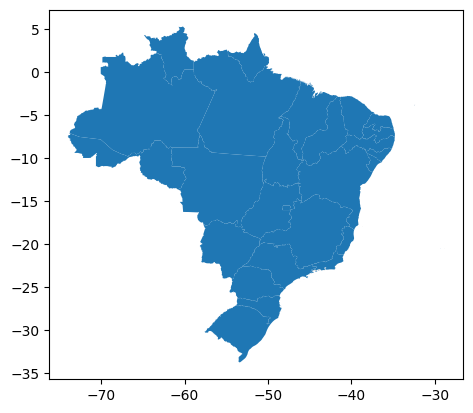

In [ ]:
br.plot()

## Criando Gráfico

In [ ]:
br.shape[0]

27

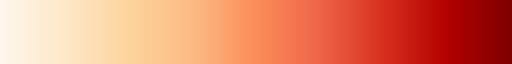

In [ ]:
sns.color_palette("OrRd", as_cmap=True)

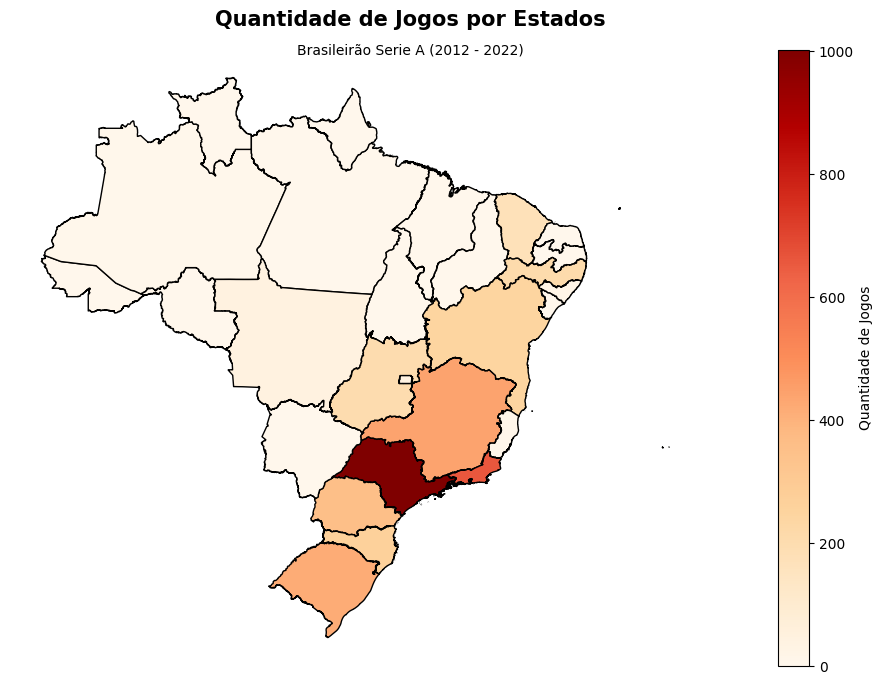

In [ ]:
fig, axes = plt.subplot_mosaic([['A']], figsize=[20,8])
br.plot(ax=axes['A'], column='QUANTIDADE_JOGOS', edgecolor='black', cmap='OrRd', legend=True,
        legend_kwds=
         {
          "label":"Quantidade de Jogos"
                     }
        )
fig.suptitle('Quantidade de Jogos por Estados', fontsize=15, fontweight='bold', x=0.60,y=0.93)
fig.text(0.60, 0.88, 'Brasileirão Serie A (2012 - 2022)', ha='center', va='center', fontsize=10)
axes['A'].set_axis_off()
axes['A'].spines['top'].set_visible(False)
axes['A'].spines['right'].set_visible(False)